In [1]:
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples = 400
centers = np.array([[2,1], [-2,-1]])
stds = np.array([[1,1],[1,1]])

In [3]:
blobs = datasets.make_blobs(n_samples, centers=centers, cluster_std=stds)
pool = blobs[0]
target = blobs[1]
#label_0_idx = y == 0
#label_1_idx = y == 1
#moons = datasets.make_moons(n_samples, noise=.05)

In [119]:
#Select a few initial istances randomly
n_samples_init = 8
samples_init_idx = np.random.choice(np.arange(n_samples), size=n_samples_init)
train_set = X[samples_init_idx,:]
train_lab = y[samples_init_idx]
lab_0_idx = y_init == 0
lab_1_idx = y_init == 1

mask = np.ones((n_samples,)).astype(np.bool)

for i in samples_init_idx:
    mask[i] = False

pool = pool[mask,:] #removing the now labeled samples
target= target[mask] #Idem

print(X_init)
print(y_init)

[[-1.52072324 -1.43085661]
 [-1.34438736 -1.50684676]
 [ 1.92217988 -0.74500587]
 [-2.05735192 -2.07435129]
 [-2.8418465  -0.41102488]
 [ 2.49669736  0.41583654]
 [-4.62084659 -2.33040591]
 [-1.5259982  -1.43017667]]
[1 1 0 1 1 0 1 1]


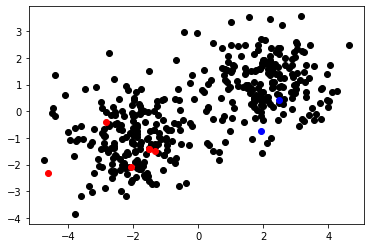

In [120]:
#plot the initial labeled data
plt.figure()
plt.scatter(X[:,0], X[:,1], c='k')
plt.scatter(X_init[init_0_idx, 0], X_init[init_0_idx, 1], c='b')
plt.scatter(X_init[init_1_idx, 0], X_init[init_1_idx, 1], c='r')
plt.show()

In [124]:
classifier = svm.SVC(C=1, kernel='linear', probability=True)

In [125]:
classifier.fit(train_set, train_lab)

y_pred = classifier.decision_function(pool)
label_pred = np.sign(y_pred)
eval_pred = label_pred - target

In [126]:
proba = classifier.predict_proba(pool)

In [194]:
class_0_prob = proba[0,:]
class_1_prob = proba[1,:]

#print(proba)
def least_confident_sampling(proba):
    """Input must be of shape (n_samples, n_classes=2)"""
    cls = proba.max(axis=1)
    least_confident = cls.argmin()
    return least_confident


def margin_sampling(proba):
    cls = np.abs(proba[:,0] - proba[:,1])
    return cls.argmin()

def entropy_sampling(proba):
    #tmp = -np.sum(proba, axis=1)
    #print(tmp.shape)
    return np.argmax(-np.sum(proba, axis=1))

"""
least_sample_idx = least_confident_sampling(proba)
print(least_sample_idx)

margin_sample_idx = margin_sampling(proba)
print(margin_sample_idx)

entropy_sample_idx = entropy_sampling(proba)
print(entropy_sample_idx)

plt.figure()
plt.scatter(pool[:,0], pool[:,1], c='k')
plt.scatter(pool[least_sample_idx,0], pool[least_sample_idx,1], c='g')
plt.scatter(pool[margin_sample_idx,0], pool[margin_sample_idx,1], c='m')
plt.scatter(pool[entropy_sample_idx,0], pool[entropy_sample_idx,1], c='c')
plt.scatter(train_set[lab_0_idx, 0], train_set[lab_0_idx, 1], c='b')
plt.scatter(train_set[lab_1_idx, 0], train_set[lab_1_idx, 1], c='r')
plt.show()
"""

"\nleast_sample_idx = least_confident_sampling(proba)\nprint(least_sample_idx)\n\nmargin_sample_idx = margin_sampling(proba)\nprint(margin_sample_idx)\n\nentropy_sample_idx = entropy_sampling(proba)\nprint(entropy_sample_idx)\n\nplt.figure()\nplt.scatter(pool[:,0], pool[:,1], c='k')\nplt.scatter(pool[least_sample_idx,0], pool[least_sample_idx,1], c='g')\nplt.scatter(pool[margin_sample_idx,0], pool[margin_sample_idx,1], c='m')\nplt.scatter(pool[entropy_sample_idx,0], pool[entropy_sample_idx,1], c='c')\nplt.scatter(train_set[lab_0_idx, 0], train_set[lab_0_idx, 1], c='b')\nplt.scatter(train_set[lab_1_idx, 0], train_set[lab_1_idx, 1], c='r')\nplt.show()\n"

In [127]:
acc = sum(abs(eval_pred)/n_samples/2/2)
print(acc)

0.1399999999999998


IndexError: boolean index did not match indexed array along dimension 0; dimension is 392 but corresponding boolean dimension is 400

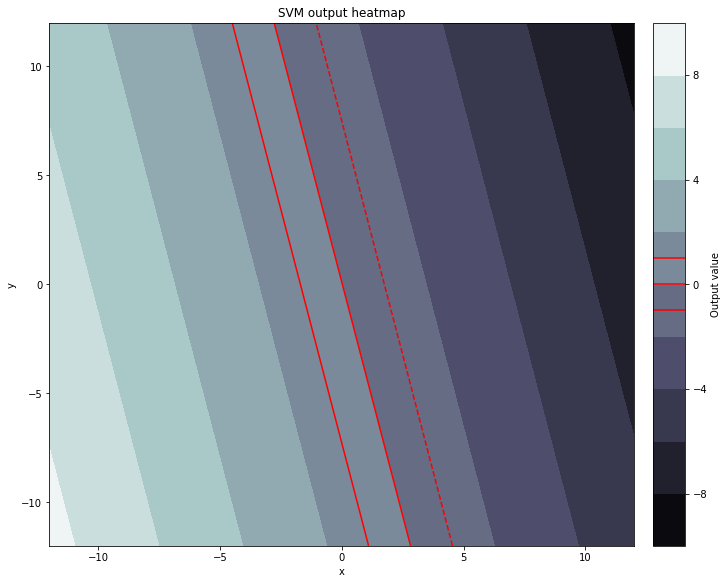

In [116]:
BX = 12
origin = 'lower'
nbs = 100
delta = (2*BX)/(nbs-1)
_x = _y = np.arange(-BX, BX + .0001, delta)
_X, _Y = np.meshgrid(_x, _y)
Xr = np.reshape(_X, (nbs*nbs, 1))
Yr = np.reshape(_Y, (nbs*nbs, 1))

Xmap = np.concatenate((Xr, Yr), axis=1)
Ymapr = classifier.decision_function(Xmap)
Ymap = np.reshape(Ymapr, (nbs, nbs))

fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(10,8))
CS = ax1.contourf(_X, _Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

CS2 = ax1.contour(CS, levels=(-1,0,1), colors='r', origin=origin)

cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')

cbar.add_lines(CS2)

ax1.scatter(X[label_0_idx, 0], X[label_0_idx, 1])
ax1.scatter(X[label_1_idx, 0], X[label_1_idx, 1], c='r')

plt.show()

In [202]:
#Algo

# 1. Generate data
n_samples = 400
centers = np.array([[2,1], [-2,-1]])
stds = np.array([[1,1],[1,1]])

blobs = datasets.make_blobs(n_samples, centers=centers, cluster_std=stds)
pool = blobs[0]
target = blobs[1]

0.99
47 [-0.25032177 -0.02666947] 1
(9, 2) (9,)
(391, 2) (391,)
140 [ 2.54126344 -0.36312118] 0
(10, 2) (10,)
(390, 2) (390,)
167 [-1.26786967  0.39814835] 1
(11, 2) (11,)
(389, 2) (389,)
220 [-1.15934726  1.40890766] 0
(12, 2) (12,)
(388, 2) (388,)
9 [ 1.67730581 -0.72280013] 0
(13, 2) (13,)
(387, 2) (387,)
6 [-0.2524174 -0.6460478] 1
(14, 2) (14,)
(386, 2) (386,)
328 [-0.56201587 -0.07404734] 1
(15, 2) (15,)
(385, 2) (385,)
36 [-1.10639901  0.7890572 ] 1
(16, 2) (16,)
(384, 2) (384,)
92 [-0.50479233  0.71516043] 1
(17, 2) (17,)
(383, 2) (383,)
RESULT:


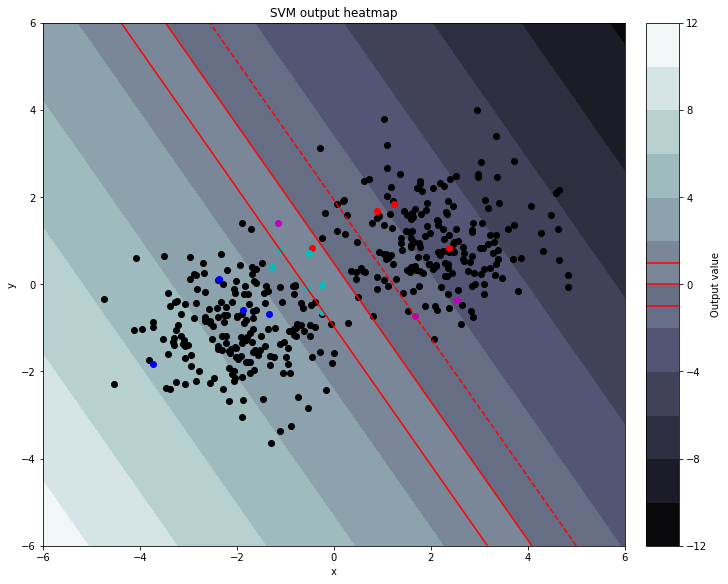

Accuracy with the whole dataset: 0.99
Accuracy with the active training: 0.9921671018276762


In [203]:
# 2. train clf on full data set

clf_ref = svm.SVC(C=1, kernel='rbf', probability=False)
clf_ref.fit(pool, target)
acc_ref = accuracy_score(target,clf_ref.predict(pool), normalize=True)
print(acc_ref)

# 3. Randomly choose few initial samples

n_samples_init = 8
samples_init_idx = np.random.choice(np.arange(n_samples), size=n_samples_init)
train_set = pool[samples_init_idx,:]
train_lab = target[samples_init_idx]
lab_0_idx = train_lab == 0
lab_1_idx = train_lab == 1
initial_label_0 = lab_0_idx
initial_label_1 = lab_1_idx
initial_samples = train_set

mask = np.ones((n_samples,)).astype(np.bool)

for i in samples_init_idx:
    mask[i] = False

pool = pool[mask,:] #removing the now labeled samples
target= target[mask] #Idem

# 4. Train 

clf = svm.SVC(C=1, kernel='linear', probability=True)
clf.fit(train_set, train_lab)
acc = accuracy_score(target, clf.predict(pool), normalize=True)
sampling_strat = margin_sampling


while acc_ref-.0001 >= acc:
    # Selecting a new sample
    new_sample_idx = sampling_strat(clf.predict_proba(pool))
    new_sample = pool[new_sample_idx,:]
    new_label = target[new_sample_idx]
    print(new_sample_idx, new_sample, new_label)
    # Adding new sample to training set
    #print(train_set)
    #print(new_sample)
    #print(np.append(train_set, np.array([new_sample]), axis=0))
    tmp_set = np.append(train_set, np.array([new_sample]), axis=0)
    tmp_lab = np.append(train_lab, new_label)
    del(train_set); del(train_lab)
    train_set = tmp_set
    train_lab = tmp_lab
    del(tmp_set); del(tmp_lab)
    lab_0_idx = train_lab == 0
    lab_1_idx = train_lab == 1
    #print(train_set.shape, train_lab.shape)
    # Removing new sample from the pool
    mask = np.ones(pool.shape[0]).astype(np.bool)
    mask[new_sample_idx] = False
    pool = pool[mask,:]
    target = target[mask]
    print(pool.shape, target.shape)
    clf.fit(train_set, train_lab)
    acc = accuracy_score(target, clf.predict(pool), normalize=True)
    """
    plt.figure()
    plt.scatter(pool[:,0], pool[:,1], c='k')
    #plt.scatter(pool[new_sample_idx,0], pool[new_sample_idx,1], c='c')
    plt.scatter(train_set[lab_0_idx, 0], train_set[lab_0_idx, 1], c='b')
    plt.scatter(train_set[lab_1_idx, 0], train_set[lab_1_idx, 1], c='r')
    plt.show()
    """


print("RESULT:")
queries = train_set[n_samples_init:,:]
queries_l = train_lab[n_samples_init:]
queries_l_0 = queries_l == 0
queries_l_1 = queries_l == 1




BX = 6
origin = 'lower'
nbs = 100
delta = (2*BX)/(nbs-1)
_x = _y = np.arange(-BX, BX + .0001, delta)
_X, _Y = np.meshgrid(_x, _y)
Xr = np.reshape(_X, (nbs*nbs, 1))
Yr = np.reshape(_Y, (nbs*nbs, 1))

Xmap = np.concatenate((Xr, Yr), axis=1)
Ymapr = clf.decision_function(Xmap)
Ymap = np.reshape(Ymapr, (nbs, nbs))

fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(10,8))
CS = ax1.contourf(_X, _Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

CS2 = ax1.contour(CS, levels=(-1,0,1), colors='r', origin=origin)

cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')

cbar.add_lines(CS2)

ax1.scatter(pool[:,0], pool[:,1], c='k')
ax1.scatter(initial_samples[initial_label_0,0], initial_samples[initial_label_0,1], c='r')
ax1.scatter(initial_samples[initial_label_1,0], initial_samples[initial_label_1,1], c='b')
ax1.scatter(queries[queries_l_0,0], queries[queries_l_0,1], c='m')
ax1.scatter(queries[queries_l_1,0], queries[queries_l_1,1], c='c')

plt.show()


"""

plt.figure()
plt.scatter(pool[:,0], pool[:,1], c='k')
plt.scatter(initial_samples[initial_label_0,0], initial_samples[initial_label_0,1], c='r')
plt.scatter(initial_samples[initial_label_1,0], initial_samples[initial_label_1,1], c='b')
plt.scatter(queries[queries_l_0,0], queries[queries_l_0,1], c='m')
plt.scatter(queries[queries_l_1,0], queries[queries_l_1,1], c='c')
plt.show()
"""
print("Accuracy with the whole dataset:", acc_ref)
print("Accuracy with the active training:", acc)